In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Pixel:
    
    def __init__(self, pos):
        """
        Square of unit side. Its center (x,y) has integer coordinates.
        At creation, the class computes also the boundaries of the pixels
        x1, x2, y1, y2.
        """
        self.x = round(pos[0])
        self.y = round(pos[1])
        self.x1 = self.x - 0.5
        self.x2 = self.x + 0.5
        self.y1 = self.y - 0.5
        self.y2 = self.y + 0.5
        
class Line:
    
    def __init__(self, p1, p2):
        """
        Line that passes between two points. Also the angular coef and intercept
        of the inverse line are computed at creation.
        """
        if p2[0] - p1[0] != 0:
            self.m = (p2[1] - p1[1]) / (p2[0] - p1[0])
            self.b = p1[1] - self.m * p1[0]
        else:
            self.m = None
            self.b = None

        if self.m == None:
            self.m_inv = 0
            self.b_inv = p1[0]
        elif self.m != 0:
            self.m_inv = 1/self.m
            self.b_inv = -self.b/self.m
        else:
            self.m_inv = None
            self.b_inv = None      
            
    def y(self, x):
        """Position along the line at given x"""
        if self.m != None:
            return self.m * x + self.b 
        else:
            return None
    
    def x(self, y):
        """Position along the inverse line at given y"""
        if self.m_inv != None:
            return self.m_inv * y + self.b_inv 
        else:
            return None

In [5]:
def area_triangle(p1, p2, p3):
    p1, p2, p3 = np.array(p1), np.array(p2), np.array(p3)
    a, b, c = np.linalg.norm(p1-p2), np.linalg.norm(p2-p3), np.linalg.norm(p3-p1)
    s =  (a + b + c)/2
    return np.sqrt( s*(s - a)*(s - b)*(s - c) )

def area_quadrilateral(p1, p2, p3, p4):
    p1, p2, p3, p4 = np.array(p1), np.array(p2), np.array(p3), np.array(p4)
    diag = np.linalg.norm(p1-p3)
    a, b = np.linalg.norm(p1-p2), np.linalg.norm(p2-p3)
    s =  (a + b + diag)/2
    a1 = np.sqrt( s*(s - a)*(s - b)*(s - diag) )
    a, b = np.linalg.norm(p3-p4), np.linalg.norm(p4-p1)
    s =  (a + b + diag)/2
    a2 = np.sqrt( s*(s - a)*(s - b)*(s - diag) )
    return a1 + a2

## 1 - Algorithm for the area of a pixel below a line

In [6]:
def area_pixel_below_line(pixel, line):
    """
    It computes the area within the pixel below the line.
    In the case of vertical line the are computed is on the right of the line.
    """
    x1, x2, y1, y2 = pixel.x1, pixel.x2, pixel.y1, pixel.y2
    l_x1 = line.y(x1)
    l_x2 = line.y(x2)
    l_y1 = line.x(y1)
    l_y2 = line.x(y2)
    
    area = 1
    if line.m == None:
        return x2 - line.b_inv
        
    if line.m >= 1:
        if l_x2 < y1:
            area = 0
        elif l_x2 < y2:
            area = (l_x2 - y1) * (x2 - l_y1) * 0.5
        elif l_x1 < y1:
            area = x2 - l_y2 + (l_y2 - l_y1) * 0.5
        elif l_x1 < y2:
            area = 1 - (y2 - l_x1) * (l_y2 - x1) * 0.5
        
    elif line.m >= 0:
        if l_x2 < y1:
            area = 0
        elif l_x1 < y1:
            area = (l_x2 - y1) * (x2 - l_y1) * 0.5
        elif l_x2 < y2:
            area = l_x1 - y1 + (l_x2 - l_x1) * 0.5
        elif l_x1 < y2:
            area = 1 - (y2 - l_x1) * (l_y2 - x1) * 0.5
        
    elif line.m >= -1:
        if l_x1 < y1:
            area = 0
        elif l_x2 < y1:
            area = (l_x1 - y1) * (l_y1 - x1) * 0.5
        elif l_x1 < y2:
            area = l_x2 - y1 + (l_x1 - l_x2) * 0.5
        elif l_x2 < y2:
            area = 1 - (y2 - l_x2) * (x2 - l_y2) * 0.5

    else:
        if l_x1 < y1:
            area = 0
        elif l_x1 < y2:
            area = (l_x1 - y1) * (l_y1 - x1) * 0.5
        elif l_x2 < y1:
            area = l_y2 - x1 + (l_y1 - l_y2) * 0.5
        elif l_x2 < y2:
            area = 1 - (y2 - l_x2) * (x2 - l_y2) * 0.5
    
    return area

In [7]:
x_square = 0
p = Pixel([0,0])
d_list = np.linspace(-1.5,1.5,200)

x1, x2, y2_offset = 0, 1, 0.5
areas = [area_pixel_below_line(p, Line([x1, d], [x2, y2_offset+d])) for d in d_list]

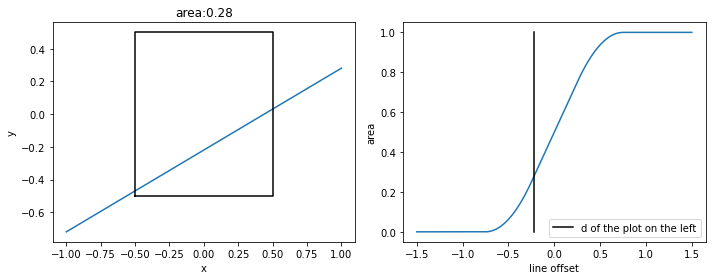

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

given_d_i = 85
d = d_list[given_d_i]
ax1.set_xlabel('x')
ax1.set_ylabel('y')
line = Line([x1, d], [x2, y2_offset+d])
area = area_pixel_below_line(p, line)
ax1.set_title('area:%3.2f'%(area))
x = np.linspace(-1,1,100)
ax1.plot(x, line.m * x + line.b)
ax1.plot([p.x1, p.x1, p.x2, p.x2, p.x1], 
         [p.y1, p.y2, p.y2, p.y1, p.y1], c='k')

ax2.set_xlabel('line offset')
ax2.set_ylabel('area')
ax2.plot(d_list, areas)
ax2.plot([d, d], [0, max(areas)], c='k', label='d of the plot on the left')
ax2.legend()

plt.tight_layout()

## 2 - Algorithm for the area of a pixel on the right of a broken line

In [9]:
dx_th = 1e-8

def find_intersection(pixel, point, adj_point, line):
    """
    It finds the intersection of the line connecting the point inside the pixel
    to the adj_point with a border of the pixel.
    It return an integer specifying the side of the pixel intersecting the line
    (0 -> north, 1 -> west, 2 -> south, 3 -> east) and the point of 
    the intersection (only the non trivial coordinate).
    """
    dx = point[0] - adj_point[0]
    dy = point[1] - adj_point[1]
    
    if dx >= dx_th:
        l_x1 = line.y(pixel.x1)
        if dy >= dx_th:
            if l_x1 < pixel.y1:
                return 2, line.x(pixel.y1)
            else:
                return 1, l_x1
        elif dy < dx_th and dy > -dx_th:
            return 1, point[1]
        else:
            if l_x1 > pixel.y2:
                return 0, line.x(pixel.y2)
            else:
                return 1, l_x1 
    elif dx < dx_th and dx > -dx_th:
        if dy > 0:
            return 2, point[0]
        else:
            return 0, point[0]
    else:
        l_x2 = line.y(pixel.x2)
        if dy > dx_th:
            if l_x2 < pixel.y1:
                return 2, line.x(pixel.y1)
            else:
                return 3, l_x2
        elif dy < dx_th and dy > -dx_th:
            return 3, point[1]
        else:
            if l_x2 > pixel.y2:
                return 0, line.x(pixel.y2)
            else:
                return 3, l_x2


def area_pixel_below_poligon(pixel, line_in, point_in, line_out, point_out, inner_points):
    """
    It compute the area within the pixel on the right of the broken line that starts from line_in,
    connects all the inner_points and exit though line_out
    """
    
    def get_extreme_val(side_i):
        if side_i == 0:
            return pixel.x1
        elif side_i == 1:
            return pixel.y1
        elif side_i == 2:
            return pixel.x2
        else:
            return pixel.y2
        
    def get_height(side_i):
        if side_i == 0:
            return pixel.y2 - inner_points[0][1]
        elif side_i == 1:
            return inner_points[0][0] - pixel.x1
        elif side_i == 2:
            return inner_points[0][1] - pixel.y1
        else:
            return pixel.x2 - inner_points[0][0]
        
    def get_coords_on_border(side_i, coord):
        if side_i == 0:
            return np.array([coord, pixel.y2])
        elif side_i == 1:
            return np.array([pixel.x1, coord])
        elif side_i == 2:
            return np.array([coord, pixel.y1])
        else:
            return np.array([pixel.x2, coord])
        
    def remaining_area():
        if len(inner_points) == 1:
            return 0
        elif len(inner_points) == 2:
            point_border = get_coords_on_border(side_out, val_out)
            return area_triangle(inner_points[0], inner_points[1], point_border)
        elif len(inner_points) == 3:
            point_border = get_coords_on_border(side_out, val_out)
            return area_quadrilateral(inner_points[0], inner_points[1], inner_points[2], point_border)
        else:
            raise Exception('invalid inner_points length')
        
    #print('in', line_in.m, line_in.m_inv)
    side_in, val_in = find_intersection(pixel, inner_points[0], point_in, line_in)
    #print('out', line_out.m, line_out.m_inv)
    side_out, val_out = find_intersection(pixel, inner_points[-1], point_out, line_out)
    
    if side_in == side_out:
        area = abs(val_in - val_out) * get_height(side_in) * 0.5
        return area + remaining_area()
    else:
        area = abs(get_extreme_val(side_in) - val_in) * get_height(side_in)
        #print(get_extreme_val(side_in), get_height(side_in), area)
        area += (1 - abs(get_extreme_val(side_out) - val_out)) * get_height(side_out)
        #print(get_extreme_val(side_out), get_height(side_out), area)
        
        for _ in range(4):
            side_in = (side_in + 1)%4
            if side_in == side_out:
                break
            area += get_height(side_in)
        #print(area)
        
        return area * 0.5 + remaining_area()

In [10]:
p_in = [0, -2]
thetas = np.linspace(3*np.pi/2, 5*np.pi/2, 200)
p_outs = [[2*np.cos(t), 2*np.sin(t)] for t in thetas]
point = [-0.3,0.3]
lines = [Line(point, p_out) for p_out in p_outs]
line_in = Line(p_in, point)
p = Pixel(point)
areas = [area_pixel_below_poligon(p, line_in, p_in, lines[i], p_outs[i], [point]) for i in range(len(lines))]

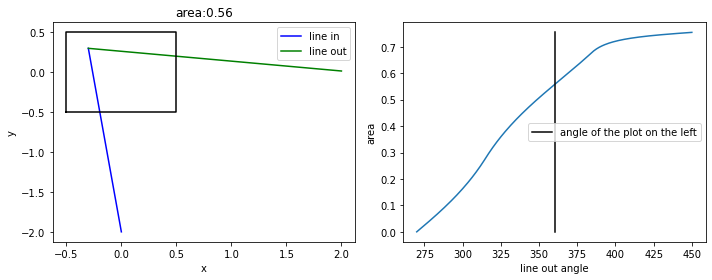

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

given_p_out_i = 100
p_out = p_outs[given_p_out_i]
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('area:%3.2f'%(areas[given_p_out_i]))
ax1.plot([p_in[0], point[0]], [p_in[1], point[1]], c='b', label='line in')
ax1.plot([point[0], p_out[0]], [point[1], p_out[1]], c='g', label='line out')
ax1.plot([p.x1, p.x1, p.x2, p.x2, p.x1], 
         [p.y1, p.y2, p.y2, p.y1, p.y1], c='k')
ax1.legend()

ax2.set_xlabel('line out angle')
ax2.set_ylabel('area')
ax2.plot(thetas * 180 / np.pi, areas)
tx = thetas[given_p_out_i] * 180 / np.pi
ax2.plot([tx, tx], [0, max(areas)], c='k', label='angle of the plot on the left')
ax2.legend()

plt.tight_layout()

In [12]:
p_in = [-0.4, -2]
thetas = np.linspace(2.6*np.pi/2, 2*np.pi, 100)
p_outs = [[2*np.cos(t), 2*np.sin(t)] for t in thetas]
point1, point2 = [-0.3,0.3],  [0.49,0.3]
lines = [Line(point2, p_out) for p_out in p_outs]
line_in = Line(p_in, point1)
p = Pixel(point1)
areas = [area_pixel_below_poligon(p, line_in, p_in, lines[i], p_outs[i], [point1, point2]) for i in range(len(lines))]

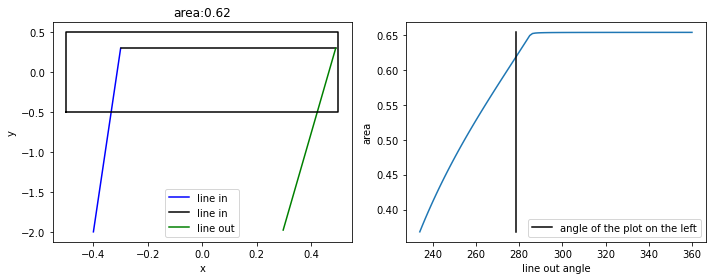

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

given_p_out_i = 35
p_out = p_outs[given_p_out_i]
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('area:%3.2f'%(areas[given_p_out_i]))
ax1.plot([p_in[0], point1[0]], [p_in[1], point1[1]], c='b', label='line in')
ax1.plot([point1[0], point2[0]], [point1[1], point2[1]], c='k', label='line in')
ax1.plot([point2[0], p_out[0]], [point2[1], p_out[1]], c='g', label='line out')
ax1.plot([p.x1, p.x1, p.x2, p.x2, p.x1], 
         [p.y1, p.y2, p.y2, p.y1, p.y1], c='k')
ax1.legend()

ax2.set_xlabel('line out angle')
ax2.set_ylabel('area')
ax2.plot(thetas * 180 / np.pi, areas)
tx = thetas[given_p_out_i] * 180 / np.pi
ax2.plot([tx, tx], [min(areas), max(areas)], c='k', label='angle of the plot on the left')
ax2.legend()

plt.tight_layout()

In [14]:
p_in = [ 2.  ,  0.4 ]
p_out = [ 2.  ,  0.4 ]
point1, point2, point3 = [ 0.45, -0.3 ],  [-0.4 , -0.4 ], [-0.4 ,  0.45]
line_out = Line(point3, p_out)
line_in = Line(p_in, point1)
p = Pixel(point1)
area = area_pixel_below_poligon(p, line_in, p_in, line_out, p_out, [point1, point2, point3])
print(area)

0.7084979838709677


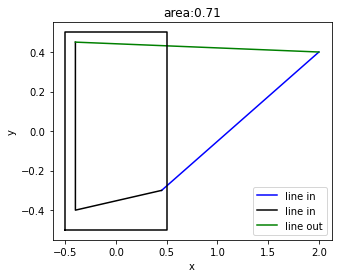

In [15]:
fig, (ax1) = plt.subplots(1,1,figsize=(5,4))

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('area:%3.2f'%(area))
ax1.plot([p_in[0], point1[0]], [p_in[1], point1[1]], c='b', label='line in')
ax1.plot([point1[0], point2[0], point3[0]], [point1[1], point2[1], point3[1]], c='k', label='line in')
ax1.plot([point3[0], p_out[0]], [point3[1], p_out[1]], c='g', label='line out')
ax1.plot([p.x1, p.x1, p.x2, p.x2, p.x1], 
         [p.y1, p.y2, p.y2, p.y1, p.y1], c='k')
ax1.legend()

## 3 - Antialiasing a quadrilateral

In [16]:
def find_vert_unique(vert_pixels):
    uniques = []
    counts = []
    for i in range(4):
        v = vert_pixels[i]
        found = False
        for j in range(len(uniques)):
            if vert_pixels[uniques[j]][0] == v[0] and vert_pixels[uniques[j]][1] == v[1]:
                counts[j] += 1
                found = True
        if not found:
            uniques.append(i)
            counts.append(1)
            
    for i, u in enumerate(uniques):
        if counts[i] > 1 and counts[i] < 4:
            for _ in range(4):
                v = vert_pixels[u]
                i_left = (u-1)%4
                if vert_pixels[i_left][0] == v[0] and vert_pixels[i_left][1] == v[1]:
                    uniques[i] = i_left
                    u = i_left
                else:
                    break
                
    return uniques, counts

In [17]:
vs = [[0, 0], [0, 0], [2, 0], [0, 0]]
uni, counts = find_vert_unique(vs)
print(uni, counts)

[3, 2] [3, 1]


In [18]:
def antialiased_quadrilateral(quad):
    """
    Rasterize the quadrilateral. quad is a list of 2d coordinates representing the
    vertices in clockwise order. It works only for convex shapes
    """
    
    # Init the canvas of pixels to ones
    pixels = np.ones(( round(max(quad[:,1]))-round(min(quad[:,1]))+1, round(max(quad[:,0]))-round(min(quad[:,0]))+1 ))
    pixel_offset = round(min(quad[:,1])), round(min(quad[:,0]))
    
    # Computing the lines joining the vertices
    lines = []
    for quad_i in range(0,4):
        next_quad_i = (quad_i + 1) % 4
        lines.append(Line(quad[quad_i], quad[next_quad_i]))
        
    # List contaning the number of pixels at each corner of the canvas that are not processed
    pixels_at_corners = [[0,0],[0,0], [0,0], [0,0]]

    # For each side of the quad, the pixels within the rectangle spanned 
    # by the segment are checked if they are in out or overlap the segment
    for quad_i in range(4):

        next_quad_i = (quad_i + 1) % 4
        p1, p2 = quad[quad_i], quad[next_quad_i]
        orient = p2[0] >= p1[0]
        if p2[0] == p1[0]:
            orient = p2[1] > p1[1]
            
        # pixel rectangle extremes spanned by the segment
        min_j, max_j = round(min(p1[0], p2[0]))-pixel_offset[1], round(max(p1[0], p2[0]))-pixel_offset[1]
        min_i, max_i = round(min(p1[1], p2[1]))-pixel_offset[0], round(max(p1[1], p2[1]))-pixel_offset[0]
        
        # Subtracting the rectangle from the pixels_at_corners
        if orient:
            if p2[1] >= p1[1]:
                pixels_at_corners[1][0] = max(pixels_at_corners[1][0], min_j)
                pixels_at_corners[1][1] = max(pixels_at_corners[1][1], pixels.shape[0]-max_i-1)
            else:
                pixels_at_corners[2][0] = max(pixels_at_corners[2][0], pixels.shape[1]-max_j-1)
                pixels_at_corners[2][1] = max(pixels_at_corners[2][1], pixels.shape[0]-max_i-1)
        else:
            if p2[1] >= p1[1]:
                pixels_at_corners[0][0] = max(pixels_at_corners[0][0], min_j)
                pixels_at_corners[0][1] = max(pixels_at_corners[0][1], min_i)
            else:
                pixels_at_corners[3][0] = max(pixels_at_corners[3][0], pixels.shape[1]-max_j-1)
                pixels_at_corners[3][1] = max(pixels_at_corners[3][1], min_i)
        
        # Checking the overlap of pixels in the rectangle with the segment
        for i in range(min_i, max_i+1):
            for j in range(min_j, max_j+1):

                area = area_pixel_below_line(Pixel([j+pixel_offset[1],i+pixel_offset[0]]), lines[quad_i])
                if not orient:
                    area = 1 - area
                
                pixels[i, j] = max(0, pixels[i, j] + area - 1)
                
    # Checking the overlap of the pixels at the vertices position
    vert_pixels = [[round(p[0]), round(p[1])] for p in quad]
    unique_vert_i, counts = find_vert_unique(vert_pixels)
    if len(unique_vert_i) == 1:
        area = area_quadrilateral(quad[0],quad[1],quad[2],quad[3])
        p = quad[unique_vert_i[0]]
        px = Pixel([p[0], p[1]])
        pixels[px.y-pixel_offset[0], px.x-pixel_offset[1]] = area
    else:
        for i in range(len(unique_vert_i)):
            p = quad[unique_vert_i[i]]
            px = Pixel([p[0], p[1]])
            p_in = quad[(unique_vert_i[i]-1)%4]
            p_out = quad[(unique_vert_i[i]+counts[i])%4]
            line_in, line_out = lines[(unique_vert_i[i]-1)%4], lines[(unique_vert_i[i]+counts[i]-1)%4]
            points = quad[unique_vert_i[i]:unique_vert_i[i]+counts[i]]
            if unique_vert_i[i]+counts[i] > 3:
                points = np.row_stack((points, quad[0:(unique_vert_i[i]+counts[i])%4]))
            area = area_pixel_below_poligon(px, line_in, p_in, line_out, p_out, points)
            pixels[px.y-pixel_offset[0], px.x-pixel_offset[1]] = area
            
    # Setting to 0 the pixel left in the canvas
    for j in range(pixels_at_corners[0][0]):
        for i in range(pixels_at_corners[0][1]):
            pixels[i, j] = 0

    for j in range(pixels_at_corners[1][0]):
        for i in range(pixels_at_corners[1][1]):
            pixels[pixels.shape[0] - i - 1, j] = 0
            
    for j in range(pixels_at_corners[2][0]):
        for i in range(pixels_at_corners[2][1]):
            pixels[pixels.shape[0] - i - 1, pixels.shape[1] - j - 1] = 0

    for j in range(pixels_at_corners[3][0]):
        for i in range(pixels_at_corners[3][1]):
            pixels[i, pixels.shape[1] - j - 1] = 0
            
    return pixels

In [19]:
quads = [np.array([[0.2,0.3], [1.2,3.2], [5,3.7], [3.2,1]])]
quads.append(np.array([[2,3.6], [1.6,4], [2,4.4], [2.4,4]]))
quads.append(np.array([[2.9,3.3], [1,6.7], [6,5.2], [4.2,3.8]]))
quads.append(np.array([[0.25,0.25], [0.25,2.4], [2.25,2.4], [2.25,0.25]]))
quads.append(np.array([[1,6], [3,9], [7,6], [4,2]]))
quads.append(np.array([[0.6, 4], [1.4,4.1], [3.4,0.4], [2.6,-0.4]]))
quads.append(np.array([[0,-0.4], [0,0.4], [2,0.4], [2,-0.4]]))
quads.append(np.array([[-0.4,-0.4], [-0.4,0.45], [2,0.4], [0.45,-0.3]]))
quads.append(np.array([[0,-0.4], [-0.4,0.45], [2,2], [0.45,-0.3]]))
quads.append(np.array([[31.75, 58.91], [31.29, 59.80],
                       [40.8, 61.99], [40, 61.01]]))

In [24]:
def run():
    for _ in range(1000):
        pixels = []
        offsets = []
        for q in quads:
            p = antialiased_quadrilateral(q)
            pixels.append(p)
            offsets.append([round(min(q[:,1])), round(min(q[:,0]))])
    return pixels, offsets

%time pixels, offsets = run()

Wall time: 4.28 s


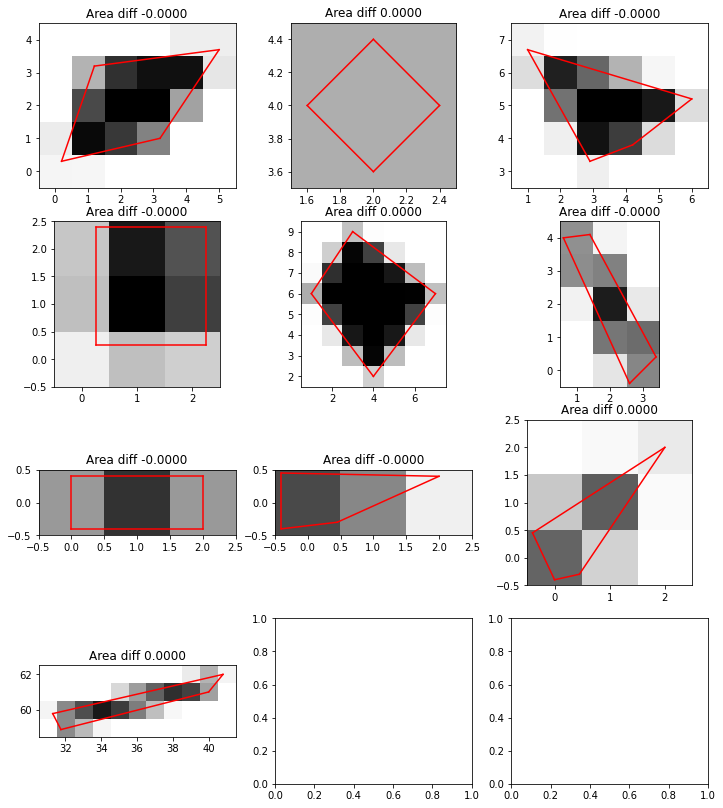

In [25]:
n_rows = int(len(quads)/3)+1
fig, axs = plt.subplots(n_rows, 3, figsize=(12,n_rows*3.5))

count=0
for k in range(len(quads)):
    i,j = k%3, int(k/3)
    d = pixels[k].sum()-area_quadrilateral(quads[k][0],quads[k][1],quads[k][2],quads[k][3])
    axs[j][i].set_title('Area diff %5.4f'%d)
    for l in range(4):
        axs[j][i].plot([quads[k][l,0], quads[k][(l+1)%4,0]], [quads[k][l,1], quads[k][(l+1)%4,1]], c='r')

    axs[j][i].imshow(pixels[k], cmap='binary', origin='lower', vmin=0, vmax=1,
               extent=(offsets[k][1]-0.5, offsets[k][1]+len(pixels[k][0])-0.5, offsets[k][0]-0.5, offsets[k][0]+len(pixels[k])-0.5))

## 4 - Antialiasing a line

In [20]:
def bezier_line(p0, p1, steps=1000):
    p0, p1 = np.array(p0), np.array(p1)
    ts = np.linspace(0,1,steps)
    return p0[:,np.newaxis] * (1 - ts) + p1[:,np.newaxis] * ts

def bezier_quad(p0, p1, p2, steps=1000):
    ts = np.linspace(0,1,steps)
    lin1, lin2 = bezier_line(p0, p1, steps), bezier_line(p1, p2, steps)
    return lin1 * (1 - ts) + lin2 * ts

def d_bezier_quad(p0, p1, p2, steps=1000):
    ts = np.linspace(0,1,steps)
    return 2 * (1 - ts) * (p1 - p0)[:,np.newaxis] + 2 * ts * (p2 - p1)[:,np.newaxis]

def bezier_cub(p0, p1, p2, p3, steps=1000):
    ts = np.linspace(0,1,steps)
    quad1, quad2 = bezier_quad(p0, p1, p2, steps), bezier_quad(p1, p2, p3, steps)
    return quad1 * (1 - ts) + quad2 * ts

def d_bezier_cub(p0, p1, p2, p3, steps=1000):
    ts = np.linspace(0,1,steps)
    return 3 * (1 - ts)**2 * (p1 - p0)[:,np.newaxis] + 6 * (1 - ts) * ts * (p2 - p1)[:,np.newaxis] + 3 * ts**2 * (p3 - p2)[:,np.newaxis]

def circle(center, radius, t1=0, t2=2*np.pi, steps=1000):
    thetas = np.linspace(t1, t2, steps)
    return (np.array([[np.cos(t), np.sin(t)] for t in thetas])*radius + np.array(center)).T

def d_circle(center, radius, t1=0, t2=2*np.pi, steps=1000):
    thetas = np.linspace(t1, t2, steps)
    return (np.array([[-np.sin(t), np.cos(t)] for t in thetas])*radius).T

In [21]:
def find_bezier_quad_discretization(p0, p1, p2, linewidth, discr_size=8):
    perimeter = np.linalg.norm(p0-p1) + np.linalg.norm(p2-p1)
    steps = int(perimeter / discr_size)
    ts = np.linspace(0,1,steps)
    curve = bezier_quad(p0, p1, p2, steps)
    dcurve = d_bezier_quad(p0, p1, p2, steps)
    tang = np.array([p / np.linalg.norm(p) for p in dcurve.T]).T
    perp1 = np.array([[-p[1], p[0]] for p in tang.T]).T
    return curve + perp1 * linewidth, curve - perp1 * linewidth

def find_bezier_cub_discretization(p0, p1, p2, p3, linewidth, discr_size=8):
    perimeter = np.linalg.norm(p0-p1) + np.linalg.norm(p2-p1) + np.linalg.norm(p3-p2)
    steps = int(perimeter / discr_size)
    ts = np.linspace(0,1,steps)
    curve = bezier_cub(p0, p1, p2, p3, steps)
    dcurve = d_bezier_cub(p0, p1, p2, p3, steps)
    tang = np.array([p / np.linalg.norm(p) for p in dcurve.T]).T
    perp1 = np.array([[-p[1], p[0]] for p in tang.T]).T
    return curve + perp1 * linewidth, curve - perp1 * linewidth

def find_circle_discretization(center, radius, linewidth, t1=0, t2=2*np.pi, min_steps=20, discr_size=8):
    if linewidth > radius:
        print('invalid parameters')
        return
    perimeter = 2*np.pi * radius
    n_steps = max(int(min_steps), int(perimeter/discr_size))
    print(n_steps)
    ts = np.linspace(0,1,n_steps)
    curve = circle(center, radius, t1, t2, n_steps)
    dcurve = d_circle(center, radius, t1, t2, n_steps)
    tang = np.array([p / np.linalg.norm(p) for p in dcurve.T]).T
    perp1 = np.array([[-p[1], p[0]] for p in tang.T]).T
    return curve + perp1 * linewidth, curve - perp1 * linewidth

In [22]:
def render_curve_naive(curve, pixels):
    for point in curve.T:
        xpix, ypix = round(point[0]), round(point[1])
        pixels[ypix, xpix] = 1
    return pixels

In [23]:
def antialiased_discretization(discr_up, discr_down, pixels):
    for i in range(len(discr_down[0])-1):
        quad = np.array([discr_down[:,i], discr_up[:,i], discr_up[:,i+1], discr_down[:,i+1]])
        aa_quad = antialiased_quadrilateral(quad)
        min_i, min_j = round(min(quad[:,1])), round(min(quad[:,0]))
        max_i, max_j = round(max(quad[:,1])), round(max(quad[:,0]))    
        if min_i < pixels.shape[0] and min_j < pixels.shape[1] and max_i > 0 and max_j > 0:
            min_pi, min_pj = max(0,min_i), max(0,min_j)
            max_pi, max_pj = min(max_i, pixels.shape[0]), min(max_j, pixels.shape[1])
            min_qi, min_qj = max(0,-min_i), max(0, -min_j)
            max_qi, max_qj = min(max_i-min_i, pixels.shape[0]-min_i-1), min(max_j-min_j, pixels.shape[1]-min_j-1)
            v = aa_quad[min_qi:max_qi+1, min_qj:max_qj+1] + pixels[min_pi:max_pi+1, min_pj:max_pj+1]
            v[v > 1] = 1
            pixels[min_pi:max_pi+1, min_pj:max_pj+1] = v
    return pixels

def area_discretization(discr_up, discr_down):
    a = 0
    for i in range(len(discr_down[0])-1):
    #for i in range(7,8):
        a += area_quadrilateral(discr_down[:,i], discr_up[:,i], discr_up[:,i+1], discr_down[:,i+1])
    return a

In [31]:
ps = np.array([[4,4], [30,110], [60,2]])
curve = bezier_quad(ps[0], ps[1], ps[2], 1000)
discr_up, discr_down = find_bezier_quad_discretization(ps[0], ps[1], ps[2], 2, 8)
pixels = np.zeros((80,100))
%time pixels = antialiased_discretization(discr_up, discr_down, pixels)
#area_check = area_discretization(discr_up, discr_down)-pixels.sum()
              
ps2 = np.array([[10,50], [35,0], [60,2], [90,50]])
curve2 = bezier_cub(ps2[0], ps2[1], ps2[2], ps2[3], 1000)
discr_up2, discr_down2 = find_bezier_cub_discretization(ps2[0], ps2[1], ps2[2], ps2[3], 1, 8)
%time pixels = antialiased_discretization(discr_up2, discr_down2, pixels)
area_check = area_discretization(discr_up, discr_down)+area_discretization(discr_up2, discr_down2)-pixels.sum()

center, radius, t1, t2 = [50,50], 30, 0, 3*np.pi/2
circle_curve = circle(center, radius, t1, t2)
discr_upc, discr_downc = find_circle_discretization(center, radius, 0.5, t1, t2, 5)
%time pixels = antialiased_discretization(discr_upc, discr_downc, pixels)

Wall time: 27.7 ms
Wall time: 15.6 ms
23
Wall time: 27.1 ms


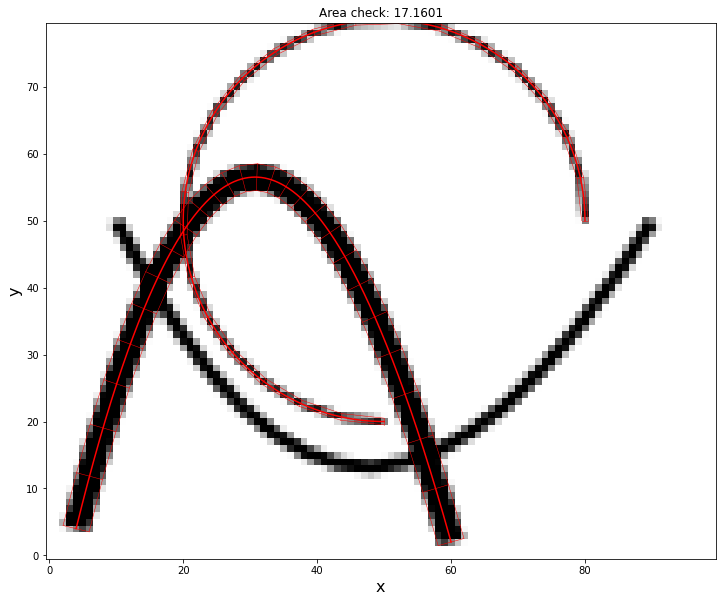

In [32]:
fig = plt.figure(figsize=(12,10))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Area check: %g'%area_check)

#plt.scatter(ps[:,0], ps[:,1], c='r', s=100)
plt.plot(curve[0], curve[1], c='r')
plt.plot(discr_up[0], discr_up[1], c='r', lw=0.5)
plt.plot(discr_down[0], discr_down[1], c='r', lw=0.5)
for i in range(len(discr_up[0])):
    plt.plot([discr_up[0,i], discr_down[0,i]], [discr_up[1,i], discr_down[1,i]], c='r', lw=0.5)
    
plt.plot(circle_curve[0], circle_curve[1], c='r')
plt.plot(discr_upc[0], discr_upc[1], c='r', lw=0.5)
plt.plot(discr_downc[0], discr_downc[1], c='r', lw=0.5)
for i in range(len(discr_upc[0])):
    plt.plot([discr_upc[0,i], discr_downc[0,i]], [discr_upc[1,i], discr_downc[1,i]], c='r', lw=0.5)
    
plt.imshow(pixels, cmap='binary', origin='lower')

In [29]:
discr_steps = [5, 8, 15, 20]
pixel_list = []
ps = np.array([[4,4], [30,140], [60,2]])
for d in discr_steps:
    discr_up, discr_down = find_bezier_quad_discretization(ps[0], ps[1], ps[2], 0.5, d)
    pixel_list.append(antialiased_discretization(discr_up, discr_down, np.zeros((80,100))))

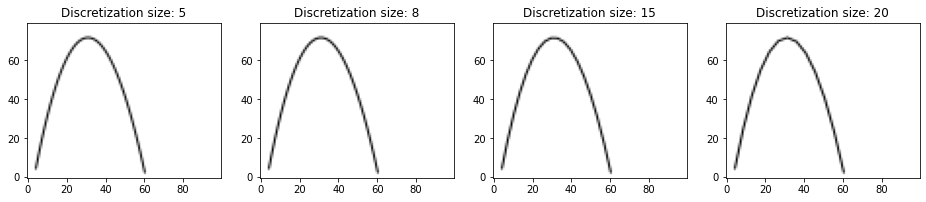

In [30]:
fig, axs = plt.subplots(1, len(discr_steps), figsize=(4*len(discr_steps),3))
for i, d in enumerate(discr_steps):
    axs[i].set_title('Discretization size: %i' %d)
    axs[i].imshow(pixel_list[i], cmap='binary', origin='lower')

In [226]:
discr_steps = [5, 8, 15, 20]
pixel_list = []
center, radius = [50,50], 2
for d in discr_steps:
    discr_up, discr_down = find_circle_discretization(center, radius, 1.5, min_steps=20, discr_size=d)
    pixel_list.append(antialiased_discretization(discr_up, discr_down, np.zeros((100,100))))

20
20
20
20


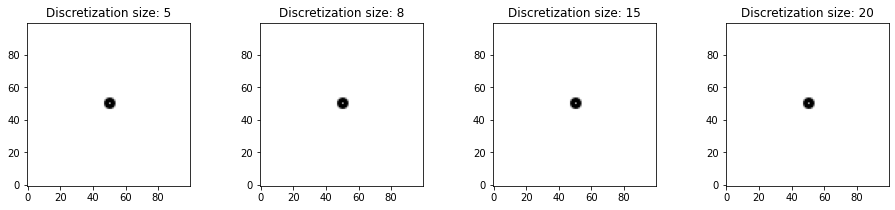

In [227]:
fig, axs = plt.subplots(1, len(discr_steps), figsize=(4*len(discr_steps),3))
for i, d in enumerate(discr_steps):
    axs[i].set_title('Discretization size: %i' %d)
    axs[i].imshow(pixel_list[i], cmap='binary', origin='lower')